In [9]:
import wpt_tools
import importlib
importlib.reload(wpt_tools)

<module 'wpt_tools' from '/Users/takuyasasatani/Documents/GitHub/Project-One/wpt_python_tools/wpt_tools.py'>

### Create instance of analysis and set initial variables

In [10]:
wpt_eval_ins = wpt_tools.wpt_eval()
rx_port = 1 # 1 or 2

### Import 2-port network data
options
- 'file' option: import touchstone file
- 'measure_pico' option: measure using picovna
    - parameters need to match cal file

In [11]:
mode = 'file'
#mode = 'measure_pico'

if mode == 'file':
    #wpt_eval_ins.import_touchstone()
    wpt_eval_ins.import_touchstone('./assets/100mmTX_20mmRX_40mmD-1.s2p')

if mode == 'measure_pico':
    # vna registry setting (it's either of these two)
    progid = "PicoControl2.PicoVNA_2"
    # progid = "PicoControl3.PicoVNA_3"

    # Export setting
    touchstone_export = 'export_touchstone/test'

    # Need to match calibration setup
    cal_file = '../sample_cal/1_to_10MHz.cal'
    start_f = 1e6 #[Hz]
    end_f = 10e6 #[Hz]
    sweep_points = 1001
    power_level = -10 #[dBm]
    RBW = 1e3 #[Hz]
    z0 = 50

    wpt_eval_ins.picoVNA_measure(cal_file=cal_file, start_f=start_f, end_f=end_f,\
        sweep_points=sweep_points, power_level=power_level, RBW=RBW, z0=z0, progid=progid)

    wpt_eval_ins.export_touchstone(touchstone_export)

../WPT/touchstone/TX_array_flex_RX/100mmTX_20mmRX_40mmD-1.s2p


### Plot Z-parameters (full-range)

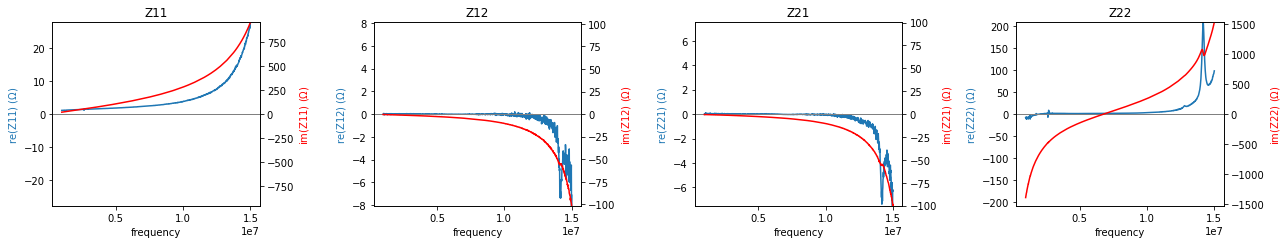

In [12]:
wpt_eval_ins.plot_z_full()

### Efficiency and optimal load analysis (for general 2-port networks)
Reference: Y. Narusue, et al., "Load optimization factors for analyzing the efficiency of wireless power transfer systems using two-port network parameters," IEICE ELEX, 2020.

Unstable when far from resonant frequency (probably because to S to Z conversion becomes unstable)

Target frequency: 6.796e+06
Maximum efficiency: 0.43
Optimum Re(Zload): 5.67
Optimum Im(Zload): -155.22


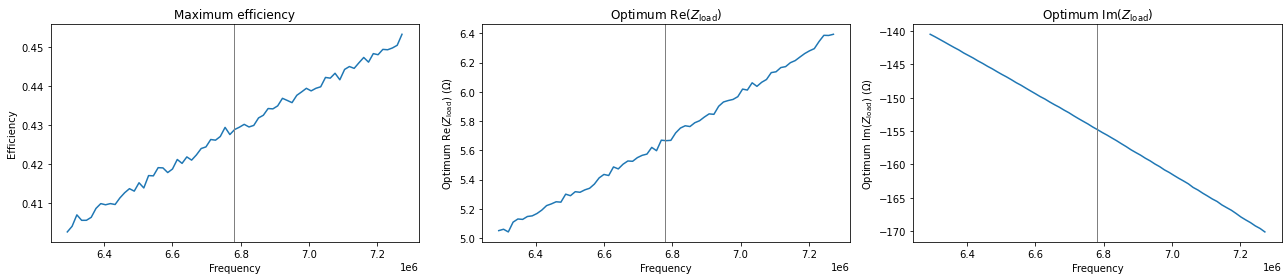

In [13]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
f_opt, eff_opt, r_opt, x_opt = wpt_eval_ins.efficiency_load_analysis(show_plot=1, rx_port=rx_port)

### Curve-fitting and Z-matrix plot (only for 2-port measurement of Series-Series LCR coupling)

R2 for fitting Ls1, Cs1: 0.999540
R2 for fitting Ls2, Cs2: 0.999822
Self impedance at target frequency

Re(Z11): 2.27e+00
Im(Z11): 1.55e+02

Re(Z22): 1.58e+00
Im(Z22) -3.21e-01

Fitting values assuming a pair of series LCR resonators

Ls1: 4.22e-06, Cs1: 9.48e-10, Rs1: 2.27e+00, f_1: 2.516e+06, Q_1 (approximate, @6.780e+06 Hz): 7.92e+01
Ls2: 6.02e-06, Cs2: 9.15e-11, Rs2: 1.58e+00, f_2: 6.782e+06, Q_2 (approximate, @6.780e+06 Hz): 1.62e+02
Lm: -1.02e-07, km: -0.020


(4.219400785838922e-06,
 9.481653587345858e-10,
 array([2.27027173]),
 6.020254726676571e-06,
 9.14760599095949e-11,
 array([1.57843751]),
 array([-1.02031277e-07]))

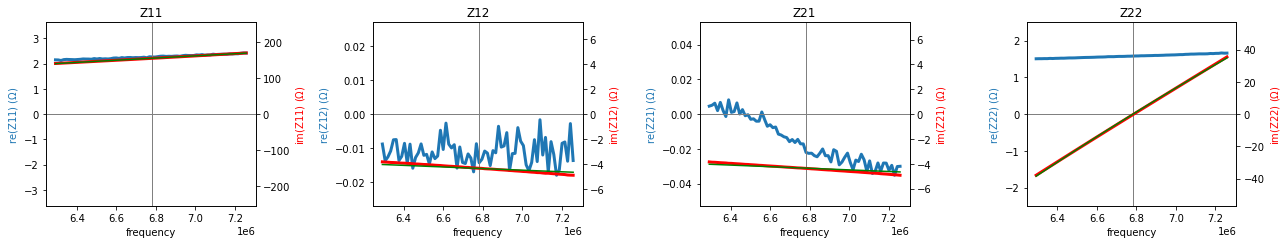

In [14]:
# For maximum efficiency analysis
target_f = 6.78e6
range_f = 1e6

wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.plot_z_narrow_fit()

### Optimal load visualization
Imura, "Wireless Power Transfer: Using Magnetic and Electric Resonance Coupling Techniques," Springer Singapore 2020.

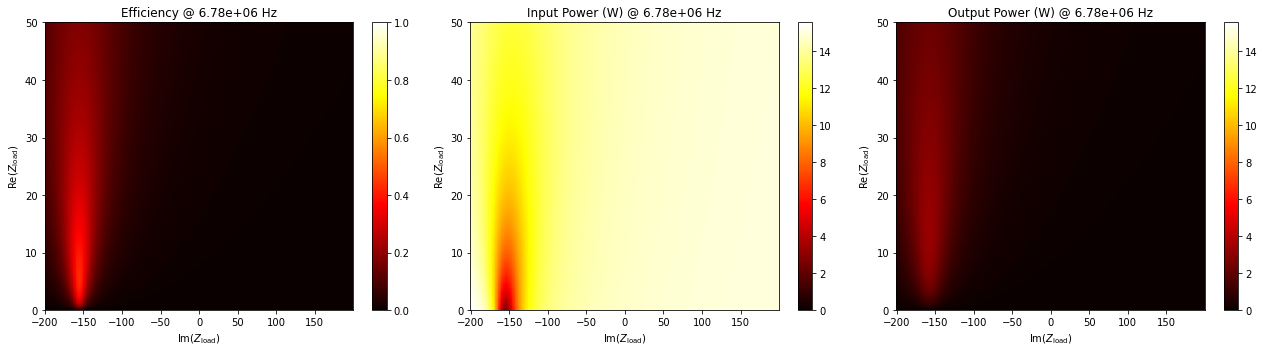

In [15]:
wpt_eval_ins.optimal_load_plot(min_rez=0.1, max_rez=50, step_rez=0.2,\
    min_imz=-200, max_imz=200, step_imz=1, input_voltage=5, rx_port=rx_port)

### Capacitor filter calculator
![](./img/CpCsRltopology.png)

In [16]:
wpt_eval_ins.set_f_target_range(target_f=target_f, range_f=range_f)
wpt_eval_ins.rxc_filter_calc(rx_port = rx_port, rload = 100, c_network = 'CpCsRl')

Target frequency: 6.796e+06
Maximum efficiency: 0.43
Receiver inductance: 4.22e-06
Optimum load: 5.67
Target Rload: 100.00

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 85
         Function evaluations: 164
[9.91928749e-11 3.12048138e-11]
